In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../../Functions/')

from EDA_functions import ExploratoryDataAnalysis
eda = ExploratoryDataAnalysis()

In [4]:
pd.options.display.max_rows = 150 
pd.set_option("display.max_colwidth", 300)
plt.style.use('seaborn-darkgrid')

In [5]:
columns_desc = pd.read_csv('../../Datasets/HomeCredit_columns_description.csv', encoding = 'latin-1', index_col = 0)
columns_desc.replace('SK_ID_PREV ', 'SK_ID_PREV', inplace = True)

### 2. Bureau and Bureau Balance

- **bureau.csv**: All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

- **bureau_balance.csv**: Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [6]:
# reading the datasets
bureau = pd.read_csv("../../Datasets/bureau.csv")
bureau_bal = pd.read_csv("../../Datasets/bureau_balance.csv")

Firstly, let's analyze the columns that we have.

In [7]:
print("The Bureau Dataset has %d rows and %d columns, while the Bureau Dataset has %d rows and %d columns." % (
    bureau.shape[0], bureau.shape[1], bureau_bal.shape[0], bureau_bal.shape[1] ))

The Bureau Dataset has 1716428 rows and 17 columns, while the Bureau Dataset has 27299925 rows and 3 columns.


In [8]:
columns_desc[columns_desc['Table'] == 'bureau.csv'] # columns of bureau.csv

Table                     Row  \
125  bureau.csv              SK_ID_CURR   
126  bureau.csv            SK_BUREAU_ID   
127  bureau.csv           CREDIT_ACTIVE   
128  bureau.csv         CREDIT_CURRENCY   
129  bureau.csv             DAYS_CREDIT   
130  bureau.csv      CREDIT_DAY_OVERDUE   
131  bureau.csv     DAYS_CREDIT_ENDDATE   
132  bureau.csv       DAYS_ENDDATE_FACT   
133  bureau.csv  AMT_CREDIT_MAX_OVERDUE   
134  bureau.csv      CNT_CREDIT_PROLONG   
135  bureau.csv          AMT_CREDIT_SUM   
136  bureau.csv     AMT_CREDIT_SUM_DEBT   
137  bureau.csv    AMT_CREDIT_SUM_LIMIT   
138  bureau.csv  AMT_CREDIT_SUM_OVERDUE   
139  bureau.csv             CREDIT_TYPE   
140  bureau.csv      DAYS_CREDIT_UPDATE   
141  bureau.csv             AMT_ANNUITY   

                                                                                                             Description  \
125  ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau    
126            Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)   
127                                                                    Status of the Credit Bureau (CB) reported credits   
128                                                                         Recoded currency of the Credit Bureau credit   
129                                   How many days before current application did client apply for Credit Bureau credit   
130                       Number of days past due on CB credit at the time of application for related loan in our sample   
131                                  Remaining duration of CB credit (in days) at the time of application in Home Credit   
132                        Days since CB credit ended at the time of application in Home Credit (only for closed credit)   
133                Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)   
134                                                                How many times was the Credit Bureau credit prolonged   
135                                                                   Current credit amount for the Credit Bureau credit   
136                                                                                 Current debt on Credit Bureau credit   
137                                                        Current credit limit of credit card reported in Credit Bureau   
138                                                                       Current amount overdue on Credit Bureau credit   
139                                                                         Type of Credit Bureau credit (Car, cash,...)   
140                       How many days before loan application did last information about the Credit Bureau credit come   
141                                                                                  Annuity of the Credit Bureau credit   

                                   Special  
125                                 hashed  
126                                 hashed  
127                                    NaN  
128                                recoded  
129  time only relative to the application  
130                                    NaN  
131  time only relative to the application  
132  time only relative to the application  
133                                    NaN  
134                                    NaN  
135                                    NaN  
136                                    NaN  
137                                    NaN  
138                                    NaN  
139                                    NaN  
140  time only relative to the application  
141                                    NaN

In [9]:
columns_desc[columns_desc['Table'] == 'bureau_balance.csv'] # columns of bureau_balance.csv

Table             Row  \
142  bureau_balance.csv    SK_BUREAU_ID   
143  bureau_balance.csv  MONTHS_BALANCE   
144  bureau_balance.csv          STATUS   

                                                                                                                                                                                                                                          Description  \
142                                                                                                                                Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table    
143                                                                                                                                                                Month of balance relative to application date (-1 means the freshest balance date)   
144  Status of Credit Bureau loan during the month (active, closed, DPD0-30,É [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,É 5 means DPD 120+ or sold or written off ] )   

                                   Special  
142                                 hashed  
143  time only relative to the application  
144                                    NaN

As we can see, the 'bureau.csv' dataset has 17 variables, and the 'bureau_balance.csv' dataset has 3 variables. These two datasets are related, so we'll analyze them together. They are connected together through the 'SK_BUREAU_ID' column. 

#### 2.A. Missing Values

We already have a function to get the missing values, so we'll just use it. 

In [10]:
eda.missing_values(bureau)

From 17 columns, there are 7 that have missing values in this dataset.


Number of Nulls Percentage of Nulls
DAYS_CREDIT_ENDDATE              105553               6.15%
DAYS_ENDDATE_FACT                633653             36.917%
AMT_CREDIT_MAX_OVERDUE          1124488             65.513%
AMT_CREDIT_SUM                       13              0.001%
AMT_CREDIT_SUM_DEBT              257669             15.012%
AMT_CREDIT_SUM_LIMIT             591780             34.477%
AMT_ANNUITY                     1226791             71.473%

7 columns out of 17 have missing values, with special emphasis to the columns 'AMT_CREDIT_MAX_OVERDUE' and 'AMT_ANNUITY', which have the highest (and pretty high) percentage of missing values, and, on the other hand, to 'DAYS_CREDIT_ENDDATE' and 'AMT_CREDIT_SUM', that have the lowest values. Again, we might need to fill these values with the mean or the median, or we might need to drop them. 

In [11]:
eda.missing_values(bureau_bal)

There are no missing values in this Dataset!


Great! There are no missing values in the 'bureau_balance.csv' file.

#### 2.B. Column Data Types

Let's check the data types that we have for these datasets.

In [12]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


We have 8 columns that are of type 'float', 6 of type 'int' and 3 of type 'object'. This means that we have 14 numerical variables and 3 categorical variables.

In [13]:
bureau_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


For the 'bureau balance' dataset, we have two numerical variables (of type 'int64') and 1 categorical variable.

#### 2.C. Numerical Variables

In [14]:
np.array(bureau.columns[bureau.dtypes != 'object'])

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
       'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'],
      dtype=object)

Excluding the ID columns, we have 12 numerical columns. They give information about a specific previous credit registered in Credit Bureau, like the remaining days until the previous credit ceases (in relation to time of application of the Home Credit loan), the amount of the previous credit, how many times has the Credit Bureau prolonged the credit, among others.

**TO FINISH**

DAYS_CREDIT 	How many days before current application did client apply for Credit Bureau credit             
CREDIT_DAY_OVERDUE 	Number of days past due on CB credit at the time of application for related loan in our sample             
DAYS_CREDIT_ENDDATE 	Remaining duration of CB credit (in days) at the time of application in Home Credit             
DAYS_ENDDATE_FACT 	Days since CB credit ended at the time of application in Home Credit (only for closed credit)             
AMT_CREDIT_MAX_OVERDUE 	Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)             
CNT_CREDIT_PROLONG 	How many times was the Credit Bureau credit prolonged             
AMT_CREDIT_SUM 	Current credit amount for the Credit Bureau credit             
AMT_CREDIT_SUM_DEBT 	Current debt on Credit Bureau credit             
AMT_CREDIT_SUM_LIMIT 	Current credit limit of credit card reported in Credit Bureau
AMT_CREDIT_SUM_OVERDUE 	Current amount overdue on Credit Bureau credit             
DAYS_CREDIT_UPDATE 	How many days before loan application did last information about the Credit Bureau credit come
AMT_ANNUITY 	Annuity of the Credit Bureau credit             


In [15]:
bureau.describe().round()

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count   1716428.0     1716428.0    1716428.0           1716428.0   
mean     278215.0     5924434.0      -1142.0                 1.0   
std      102939.0      532266.0        795.0                37.0   
min      100001.0     5000000.0      -2922.0                 0.0   
25%      188867.0     5463954.0      -1666.0                 0.0   
50%      278055.0     5926304.0       -987.0                 0.0   
75%      367426.0     6385681.0       -474.0                 0.0   
max      456255.0     6843457.0          0.0              2792.0   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count            1610875.0          1082775.0                591940.0   
mean                 511.0            -1017.0                  3825.0   
std                 4994.0              714.0                206032.0   
min               -42060.0           -42023.0                     0.0   
25%                -1138.0            -1489.0                     0.0   
50%                 -330.0             -897.0                     0.0   
75%                  474.0             -425.0                     0.0   
max                31199.0                0.0             115987185.0   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count           1716428.0       1716415.0            1458759.0   
mean                  0.0        354995.0             137085.0   
std                   0.0       1149811.0             677401.0   
min                   0.0             0.0           -4705600.0   
25%                   0.0         51300.0                  0.0   
50%                   0.0        125518.0                  0.0   
75%                   0.0        315000.0              40154.0   
max                   9.0     585000000.0          170100000.0   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count             1124648.0               1716428.0           1716428.0   
mean                 6230.0                    38.0              -594.0   
std                 45032.0                  5938.0               721.0   
min               -586406.0                     0.0            -41947.0   
25%                     0.0                     0.0              -908.0   
50%                     0.0                     0.0              -395.0   
75%                     0.0                     0.0               -33.0   
max               4705600.0               3756681.0               372.0   

       AMT_ANNUITY  
count     489637.0  
mean       15713.0  
std       325827.0  
min            0.0  
25%            0.0  
50%            0.0  
75%        13500.0  
max    118453424.0

[COMMENT]

count    1716428.00
mean           3.13
std            2.18
min           -0.00
25%            1.30
50%            2.70
75%            4.56
max            8.01
Name: DAYS_CREDIT, dtype: float64


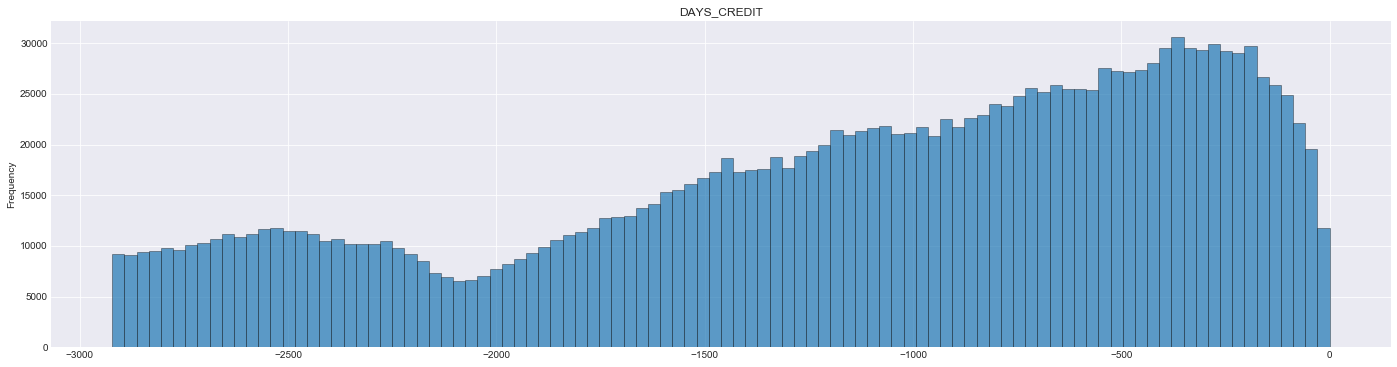

In [16]:
print((bureau['DAYS_CREDIT'] / -365).describe().round(2))
bureau['DAYS_CREDIT'].plot.hist(bins = 100, figsize=(24,6), title = 'DAYS_CREDIT', alpha = 0.7, edgecolor = 'black', linewidth = 0.5)
plt.show()

[COMMENT]

count    1716428.00
mean           0.82
std           36.54
min            0.00
25%            0.00
50%            0.00
75%            0.00
max         2792.00
Name: CREDIT_DAY_OVERDUE, dtype: float64


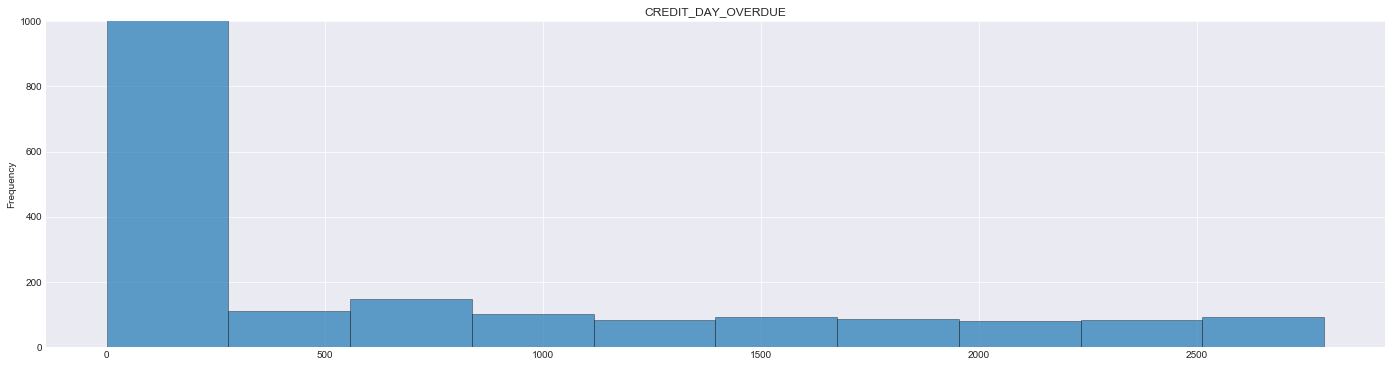

In [17]:
print(bureau['CREDIT_DAY_OVERDUE'].describe().round(2))
bureau['CREDIT_DAY_OVERDUE'].plot.hist(figsize=(24,6), title = 'CREDIT_DAY_OVERDUE', edgecolor = 'black', alpha = 0.7, linewidth = 0.5)
plt.ticklabel_format(axis = "both", style = "plain")
plt.ylim([0, 1000])
plt.show()

[COMMENT]
outliers + corrections

count    1716428.00
mean           0.01
std            0.10
min            0.00
25%            0.00
50%            0.00
75%            0.00
max            9.00
Name: CNT_CREDIT_PROLONG, dtype: float64


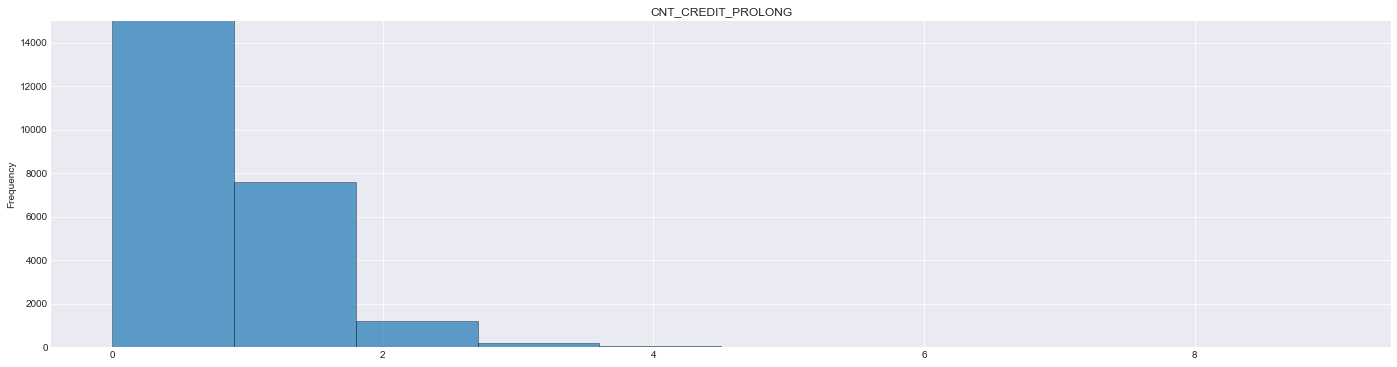

In [18]:
print(bureau['CNT_CREDIT_PROLONG'].describe().round(2))
bureau['CNT_CREDIT_PROLONG'].plot.hist(figsize=(24,6), title = 'CNT_CREDIT_PROLONG', edgecolor = 'black', linewidth = 0.5, alpha = 0.7)
plt.ticklabel_format(axis = "both", style = "plain")
plt.ylim([0, 15000])
plt.show()

[COMMENT] anomalies + corrections

In [19]:
## ADAPT TO THIS DATASET --> POSSIBLE?

plt.figure(figsize = (7, 5))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target = 1')
plt.legend()
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages per Target')
plt.show()

NameError: name 'app_train' is not defined

<Figure size 504x360 with 0 Axes>

It seems that client's with less than 40 years are more prone to pay the loan, whereas client's with more than 40 years tend to have more payment difficulties.

Let's see the numerical variables of the 'bureau_balance' dataset.

In [ ]:
np.array(bureau_bal.columns[bureau_bal.dtypes != 'object'])

Only one: 'MONTH_BALANCE', which is the month of balance relative to application date. 

In [ ]:
print(bureau_bal['MONTHS_BALANCE'].describe().round(2))
bureau_bal['MONTHS_BALANCE'].plot.hist(bins = 20, figsize = (24,6), title = 'Month of balance relative to application date', 
                                    edgecolor = 'black', linewidth = 0.5, alpha = 0.7)
plt.ticklabel_format(axis = "both", style = "plain")
plt.show()

[COMMENT]

#### 2.D. Categorical Variables

In [ ]:
np.array(bureau.columns[bureau.dtypes == 'object'])

In [ ]:
bureau.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

We have only 3 categorical variables for the bureau dataset: 2 of them have 4 different values, and the third one has 15, which is a bit high.

To analyze the frequency of these variables, let's make a function that plots a bar chart.

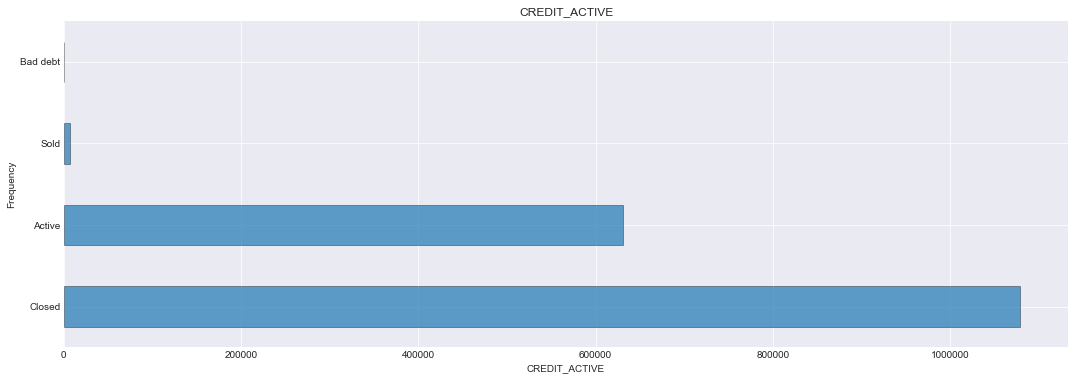

In [20]:
eda.plot_cat_freq(bureau, 'CREDIT_ACTIVE', 'CREDIT_ACTIVE')

[COMMENT]

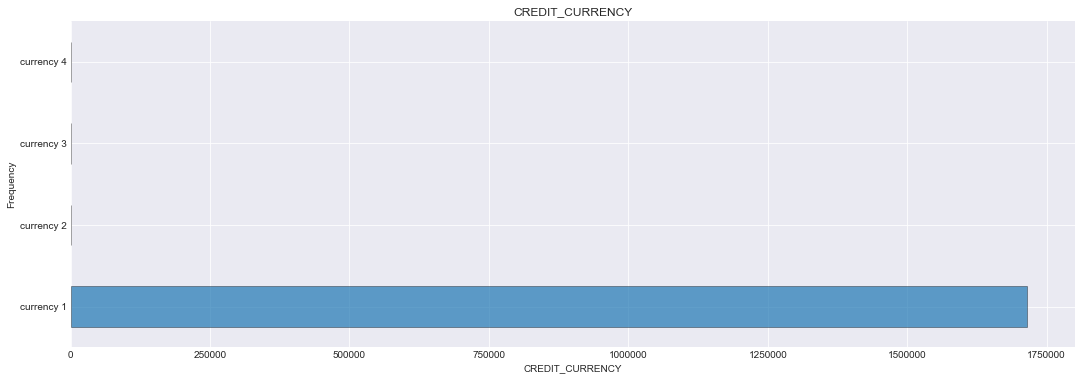

In [21]:
eda.plot_cat_freq(bureau, 'CREDIT_CURRENCY', 'CREDIT_CURRENCY')

[COMMENT]

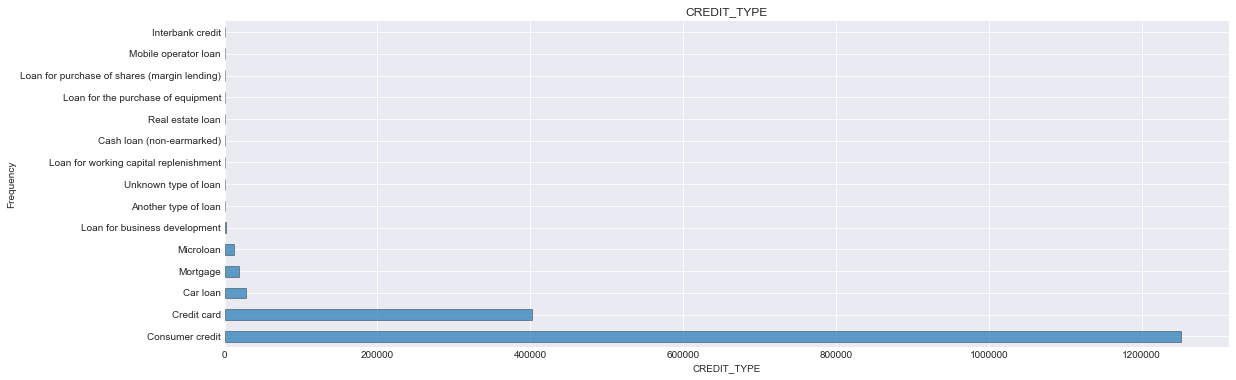

In [22]:
eda.plot_cat_freq(bureau, 'CREDIT_TYPE', 'CREDIT_TYPE')

[COMMENT]

What about the bureau_balance dataset?

In [23]:
np.array(bureau_bal.columns[bureau_bal.dtypes == 'object'])

array(['STATUS'], dtype=object)

Only one categorical column, which we'll analyze below.

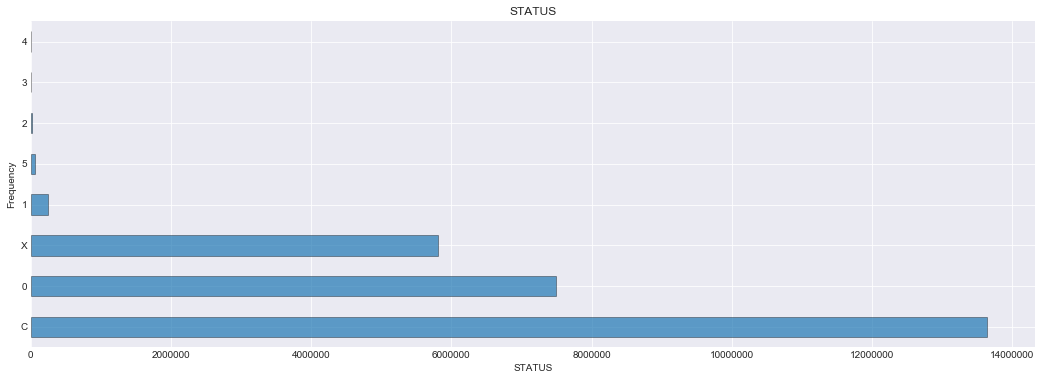

In [24]:
eda.plot_cat_freq(bureau_bal, 'STATUS', 'STATUS')

[COMMENT]

#### 2.E. Correlations

In [25]:
bureau.iloc[:, 2:].corr()

DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
DAYS_CREDIT                1.000000           -0.027266             0.225682   
CREDIT_DAY_OVERDUE        -0.027266            1.000000            -0.007352   
DAYS_CREDIT_ENDDATE        0.225682           -0.007352             1.000000   
DAYS_ENDDATE_FACT          0.875359           -0.008637             0.248825   
AMT_CREDIT_MAX_OVERDUE    -0.014724            0.001249             0.000577   
CNT_CREDIT_PROLONG        -0.030460            0.002756             0.113683   
AMT_CREDIT_SUM             0.050883           -0.003292             0.055424   
AMT_CREDIT_SUM_DEBT        0.135397           -0.002355             0.081298   
AMT_CREDIT_SUM_LIMIT       0.025140           -0.000345             0.095421   
AMT_CREDIT_SUM_OVERDUE    -0.000383            0.090951             0.001077   
DAYS_CREDIT_UPDATE         0.688771           -0.018461             0.248525   
AMT_ANNUITY                0.005676           -0.000339             0.000475   

                        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
DAYS_CREDIT                      0.875359               -0.014724   
CREDIT_DAY_OVERDUE              -0.008637                0.001249   
DAYS_CREDIT_ENDDATE              0.248825                0.000577   
DAYS_ENDDATE_FACT                1.000000                0.000999   
AMT_CREDIT_MAX_OVERDUE           0.000999                1.000000   
CNT_CREDIT_PROLONG               0.012017                0.001523   
AMT_CREDIT_SUM                   0.059096                0.081663   
AMT_CREDIT_SUM_DEBT              0.019609                0.014007   
AMT_CREDIT_SUM_LIMIT             0.019476               -0.000112   
AMT_CREDIT_SUM_OVERDUE          -0.000332                0.015036   
DAYS_CREDIT_UPDATE               0.751294               -0.000749   
AMT_ANNUITY                      0.006274                0.001578   

                        CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
DAYS_CREDIT                      -0.030460        0.050883   
CREDIT_DAY_OVERDUE                0.002756       -0.003292   
DAYS_CREDIT_ENDDATE               0.113683        0.055424   
DAYS_ENDDATE_FACT                 0.012017        0.059096   
AMT_CREDIT_MAX_OVERDUE            0.001523        0.081663   
CNT_CREDIT_PROLONG                1.000000       -0.008345   
AMT_CREDIT_SUM                   -0.008345        1.000000   
AMT_CREDIT_SUM_DEBT              -0.001366        0.683419   
AMT_CREDIT_SUM_LIMIT              0.073805        0.003756   
AMT_CREDIT_SUM_OVERDUE            0.000002        0.006342   
DAYS_CREDIT_UPDATE                0.017864        0.104629   
AMT_ANNUITY                      -0.000465        0.049146   

                        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
DAYS_CREDIT                        0.135397              0.025140   
CREDIT_DAY_OVERDUE                -0.002355             -0.000345   
DAYS_CREDIT_ENDDATE                0.081298              0.095421   
DAYS_ENDDATE_FACT                  0.019609              0.019476   
AMT_CREDIT_MAX_OVERDUE             0.014007             -0.000112   
CNT_CREDIT_PROLONG                -0.001366              0.073805   
AMT_CREDIT_SUM                     0.683419              0.003756   
AMT_CREDIT_SUM_DEBT                1.000000             -0.018215   
AMT_CREDIT_SUM_LIMIT              -0.018215              1.000000   
AMT_CREDIT_SUM_OVERDUE             0.008046             -0.000687   
DAYS_CREDIT_UPDATE                 0.141235              0.046028   
AMT_ANNUITY                        0.025507              0.004392   

                        AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
DAYS_CREDIT                          -0.000383            0.688771   
CREDIT_DAY_OVERDUE                    0.090951           -0.018461   
DAYS_CREDIT_ENDDATE                   0.001077            0.248525   
DAYS_ENDDATE_FACT                    -0.000332            0.751294   
AMT_CREDIT_MAX_OVERDUE        

<div class="alert alert-danger">
    <b> FINAL REMARKS </b>
    <br> This is to summarize what were the conclusions of this part. TO DELETE ONCE THE DATA CLEANING IS DONE. </br>
    <p> </p>
    <p> i) </p>
    <p> ii) </p>
    <p> iii) </p>
    <p> iv) </p>
    <p> v) </p>
</div>